###Data Source:
https://www.omdbapi.com/

# Introduction:

In this data analytics project, we aim to gain valuable insights into the factors influencing the success of movies by utilizing two powerful machine learning techniques: linear regression and KMeans clustering. The first part of the analysis focuses on predicting box office performance using a linear regression model. By examining various features such as budget, genre, runtime, and ratings, we seek to identify the key factors that influence a movie's box office numbers. By training a regression model on historical data, we aim to make accurate predictions that can assist filmmakers and industry professionals in making data-driven decisions regarding production and marketing strategies.

The second part of the project uses KMeans clustering to group movies based on their success. By clustering movies into distinct groups, we can uncover patterns that distinguish successful films from unsuccessful ones. These clusters, formed based on features such as ratings and votes, will provide deeper insights into the types of movies that tend to perform well and those that face challenges in the market.

Together, these models will provide a comprehensive analysis of the movie industry, revealing valuable insights into movie success and helping to predict future box office outcomes.

# **Part One: Importing Data**

In [ ]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, accuracy_score
import requests
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA

In [ ]:
#List of movies to pull from the API.

movies = [
    "The Shawshank Redemption", "The Godfather", "The Dark Knight", "Inception",
    "The Lord of the Rings: The Return of the King", "Avengers: Endgame", "Titanic",
    "Forrest Gump", "The Matrix", "Gladiator", "The Lion King", "Spider-Man: No Way Home",
    "Avengers: Infinity War", "Jurassic Park", "Frozen", "Shrek",
    "Harry Potter and the Sorcerer’s Stone", "The Empire Strikes Back",
    "Black Panther", "The Godfather: Part II", "Pulp Fiction", "Schindler's List",
    "The Grand Budapest Hotel", "The Departed", "The Social Network",
    "Parasite", "Goodfellas", "Whiplash", "Interstellar", "The Prestige",
    "The Big Short", "The Wolf of Wall Street", "The Irishman", "A Beautiful Mind",
    "The King's Speech", "The Martian", "Coco", "Toy Story 3", "Finding Nemo",
    "Inside Out", "Zootopia", "The Incredibles", "Moana", "Up",
    "Ratatouille", "The LEGO Movie", "How to Train Your Dragon",
    "Spider-Man: Into the Spider-Verse", "Deadpool", "Guardians of the Galaxy",
    "Doctor Strange", "Ant-Man", "Iron Man", "Thor: Ragnarok",
    "Wonder Woman", "Captain Marvel", "Django Unchained", "Inglourious Basterds",
    "The Revenant", "The Hateful Eight", "Mad Max: Fury Road",
    "12 Years a Slave", "La La Land", "Les Misérables", "The Hunger Games",
    "The Twilight Saga: Breaking Dawn - Part 2", "Twilight",
    "The Maze Runner", "Divergent", "The Fault in Our Stars",
    "The Notebook", "A Star is Born", "Rocky", "Creed", "Logan",
    "The Dark Knight Rises", "Batman Begins", "Joker",
    "Star Wars: The Force Awakens", "Star Wars: A New Hope", "Avatar",
    "The Silence of the Lambs", "A Clockwork Orange", "The Exorcist",
    "Jaws", "The Shining", "It", "It Chapter Two", "The Conjuring",
    "Annabelle", "Hereditary", "Get Out", "A Quiet Place",
    "The Nun", "Midsommar", "The Babadook", "Bird Box",
    "The Invisible Man", "The Blair Witch Project",
    "The Texas Chainsaw Massacre", "Halloween", "Scream",
    "The Ring", "The Sixth Sense", "Signs", "Split", "Oldboy",
    "Snowpiercer", "Train to Busan", "The Host",
    "Pan's Labyrinth", "The Shape of Water", "The Great Gatsby",
    "The Truman Show", "The Secret Life of Walter Mitty",
    "Catch Me If You Can", "The Pursuit of Happyness",
    "The Green Mile", "Fargo", "The Pianist", "Eternal Sunshine of the Spotless Mind",
    "American Beauty", "Taxi Driver", "The Big Lebowski",
    "There Will Be Blood", "The Good, the Bad and the Ugly",
    "No Country for Old Men", "Heat", "Drive", "Requiem for a Dream",
    "Birdman", "The Theory of Everything", "Moonlight",
    "The Help", "The Blind Side", "Slumdog Millionaire",
    "Cats", "The Emoji Movie", "The Love Guru", "Gigli", "Battlefield Earth",
    "The Last Airbender", "Dragonball Evolution", "The Room", "Jack and Jill",
    "Superman IV: The Quest for Peace", "Batman & Robin", "Foodfight!",
    "Son of the Mask", "The Happening", "Jaws: The Revenge", "The Lone Ranger",
    "After Earth", "Fantastic Four (2015)", "Green Lantern",
    "The Adventures of Pluto Nash", "Wild Wild West", "Howard the Duck",
    "The Cat in the Hat", "Movie 43", "A Thousand Words",
    "Bucky Larson: Born to Be a Star", "The Master of Disguise",
    "The Ridiculous 6", "Dirty Grandpa", "Pixels", "Dumb and Dumber To",
    "The Cobbler", "The Open House", "Holmes & Watson", "Fifty Shades of Grey",
    "Fifty Shades Darker", "Fifty Shades Freed", "Twilight: New Moon",
    "Elektra", "Ghost Rider: Spirit of Vengeance", "Jonah Hex",
    "The Wicker Man", "Lady in the Water", "The Postman", "The Bonfire of the Vanities",
    "Cutthroat Island", "Mars Needs Moms", "Jupiter Ascending",
    "The Snowman", "Victor Frankenstein", "Mortal Engines",
    "R.I.P.D.", "The Golden Compass", "Percy Jackson & the Olympians: The Lightning Thief",
    "Eragon", "I, Frankenstein", "Seventh Son", "The Godfather: Part III",
    "Gods of Egypt", "Dark Phoenix", "Fantastic Four: Rise of the Silver Surfer",
    "Speed Racer", "The Spirit", "Vampires Suck", "Disaster Movie",
    "Meet the Spartans", "Epic Movie", "Date Movie", "The Dark Knight Returns",
    "A Haunted House", "John Carter", "The Dark Tower",
    "The Oogieloves in the Big Balloon Adventure", "Delgo",
    "Strange Magic", "Norm of the North", "Nine Lives", "Furry Vengeance",
    "Beverly Hills Chihuahua", "Alvin and the Chipmunks: Chipwrecked",
    "Hop", "Yogi Bear", "Gnomeo & Juliet", "Shark Tale",
    "Planes", "Planes: Fire & Rescue", "The Wild", "Chicken Little",
    "Home on the Range", "The Black Cauldron", "Atlantis: The Lost Empire",
    "Treasure Planet", "Mars Needs Moms", "The Country Bears",
    "Dinosaur", "Hoodwinked Too! Hood vs. Evil", "Shrek the Third",
    "Shrek Forever After", "Happy Feet Two", "Ice Age: Collision Course",
    "The Angry Birds Movie 2", "The Star", "Smallfoot",
    "The Boss Baby", "The Croods: A New Age", "Peter Rabbit",
    "Arctic Dogs", "Playmobil: The Movie", "Wonder Park", "Star Wars: The Rise of Skywalker",
    "The Queen’s Corgi", "The Addams Family (2019)", "Hotel Transylvania 3",
    "Trolls World Tour", "Sing 2", "Rio 2", "The Nut Job 2", "Free Birds",
    "Rock Dog", "Ferdinand", "Sherlock Gnomes", "The Lego Ninjago Movie",
    "The Angry Birds Movie", "The Emoji Movie"
]


In [ ]:
#Extracting data from the API
api_key = '65aa2ab6'

movie_data = []

#Looping and appending movie data from the API into a list, using error handling to ensure that errors are handled properly.
for movie in movies:
  try:
      url = f'http://www.omdbapi.com/?apikey={api_key}&t={movie}'
      response = requests.get(url)
      response.raise_for_status()
      data = response.json()
      box_office = data.get('BoxOffice', None)
      if data['Response'] == 'True':
            imdb_rating = data.get('imdbRating', 'N/A')
            if imdb_rating != 'N/A':
                imdb_rating = float(imdb_rating)
            else:
                imdb_rating = None
            movie_info = {
                'Title': data['Title'],
                'Year': int(data['Year'][:4]),
                'Rated': data['Rated'],
                'Released Month': data['Released'][3:7],
                'Runtime': data['Runtime'],
                'Genre': data['Genre'],
                'Director': data['Director'],
                'Writer': data['Writer'],
                'Actors': data['Actors'],
                'Country': data['Country'],
                'IMDb Votes': data['imdbVotes'],
                'IMDb Rating': imdb_rating,
                'Metascore': data['Metascore'],
                'BoxOffice': box_office
            }

            movie_data.append(movie_info)
      else:
            print(f"Movie '{movie}' not found.")
  except requests.exceptions.HTTPError as err:
        print(f"HTTP error occurred: {err}")
  except requests.exceptions.RequestException as err:
        print(f"Request error occurred: {err}")
  except Exception as err:
        print(f"An error occurred: {err}")

In [ ]:
#Loading the movies from the list into a dataframe.
df_movies = pd.DataFrame(movie_data)
df_movies.head()

,Title,Year,Rated,Released Month,Runtime,Genre,Director,Writer,Actors,Country,IMDb Votes,IMDb Rating,Metascore,BoxOffice
0,The Shawshank Redemption,1994,R,Oct,142 min,Drama,Frank Darabont,"Stephen King, Frank Darabont","Tim Robbins, Morgan Freeman, Bob Gunton",United States,"2,970,162",9.3,82,"$28,767,189"
1,The Godfather,1972,R,Mar,175 min,"Crime, Drama",Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola","Marlon Brando, Al Pacino, James Caan",United States,"2,068,172",9.2,100,"$136,381,073"
2,The Dark Knight,2008,PG-13,Jul,152 min,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Goyer","Christian Bale, Heath Ledger, Aaron Eckhart","United States, United Kingdom","2,947,373",9.0,84,"$534,987,076"
3,Inception,2010,PG-13,Jul,148 min,"Action, Adventure, Sci-Fi",Christopher Nolan,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...","United States, United Kingdom","2,615,361",8.8,74,"$292,587,330"
4,The Lord of the Rings: The Return of the King,2003,PG-13,Dec,201 min,"Action, Adventure, Drama",Peter Jackson,"J.R.R. Tolkien, Fran Walsh, Philippa Boyens","Elijah Wood, Viggo Mortensen, Ian McKellen","New Zealand, United States","2,032,567",9.0,94,"$381,878,219"


# **Part Two: Data Cleaning**

In [ ]:
#Replacing the Approved movie rating with G (General Audience) since they both mean something very similar and there is no need to keep both.
df_movies['Rated'].unique()
df_movies['Rated'] = df_movies['Rated'].replace('Approved', 'G')

In [ ]:
#Removing the word "min" from the runtime column in order to convert the minutes into an integer.
df_movies['Runtime'] = df_movies['Runtime'].str.extract('(\d+)').astype(float)
df_movies['Runtime'] = df_movies['Runtime'].fillna(df_movies['Runtime'].mean())
df_movies['Runtime'] = df_movies['Runtime'].astype(int)
df_movies = df_movies.rename(columns={'Runtime': 'Runtime (Minutes)'})
display(df_movies.head())

,Title,Year,Rated,Released Month,Runtime (Minutes),Genre,Director,Writer,Actors,Country,IMDb Votes,IMDb Rating,Metascore,BoxOffice
0,The Shawshank Redemption,1994,R,Oct,142,Drama,Frank Darabont,"Stephen King, Frank Darabont","Tim Robbins, Morgan Freeman, Bob Gunton",United States,"2,970,162",9.3,82,"$28,767,189"
1,The Godfather,1972,R,Mar,175,"Crime, Drama",Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola","Marlon Brando, Al Pacino, James Caan",United States,"2,068,172",9.2,100,"$136,381,073"
2,The Dark Knight,2008,PG-13,Jul,152,"Action, Crime, Drama",Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Goyer","Christian Bale, Heath Ledger, Aaron Eckhart","United States, United Kingdom","2,947,373",9.0,84,"$534,987,076"
3,Inception,2010,PG-13,Jul,148,"Action, Adventure, Sci-Fi",Christopher Nolan,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...","United States, United Kingdom","2,615,361",8.8,74,"$292,587,330"
4,The Lord of the Rings: The Return of the King,2003,PG-13,Dec,201,"Action, Adventure, Drama",Peter Jackson,"J.R.R. Tolkien, Fran Walsh, Philippa Boyens","Elijah Wood, Viggo Mortensen, Ian McKellen","New Zealand, United States","2,032,567",9.0,94,"$381,878,219"


In [ ]:
#Since genre, director, writer, and country columns provide a list of values, I am only keeping the first value in the list and removing the others after the first ",".
#I am also renaming "Actors" to "Starring Actor" to keep the name singular and more accurately describe what the column provides.
df_movies['Genre'] = df_movies['Genre'].str.extract('(^[^,]+)')
df_movies['Director'] = df_movies['Director'].str.extract('(^[^,]+)')
df_movies['Writer'] = df_movies['Writer'].str.extract('(^[^,]+)')
df_movies['Country'] = df_movies['Country'].str.extract('(^[^,]+)')
df_movies['Actors'] = df_movies['Actors'].str.extract('(^[^,]+)')
df_movies.rename(columns={'Actors': 'Starring Actor'}, inplace=True)
df_movies.head()

,Title,Year,Rated,Released Month,Runtime (Minutes),Genre,Director,Writer,Starring Actor,Country,IMDb Votes,IMDb Rating,Metascore,BoxOffice
0,The Shawshank Redemption,1994,R,Oct,142,Drama,Frank Darabont,Stephen King,Tim Robbins,United States,"2,970,162",9.3,82,"$28,767,189"
1,The Godfather,1972,R,Mar,175,Crime,Francis Ford Coppola,Mario Puzo,Marlon Brando,United States,"2,068,172",9.2,100,"$136,381,073"
2,The Dark Knight,2008,PG-13,Jul,152,Action,Christopher Nolan,Jonathan Nolan,Christian Bale,United States,"2,947,373",9.0,84,"$534,987,076"
3,Inception,2010,PG-13,Jul,148,Action,Christopher Nolan,Christopher Nolan,Leonardo DiCaprio,United States,"2,615,361",8.8,74,"$292,587,330"
4,The Lord of the Rings: The Return of the King,2003,PG-13,Dec,201,Action,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,"2,032,567",9.0,94,"$381,878,219"


In [ ]:
#Fixing the IMDb votes by removing any commas, so I can convert them to an float.
df_movies['IMDb Votes'] = df_movies['IMDb Votes'].replace('N/A', np.nan).str.replace(',', '').astype(float)
df_movies['IMDb Votes'] = df_movies['IMDb Votes'].fillna(0).astype(int)
df_movies['IMDb Rating'] = df_movies['IMDb Rating'].astype(float)
df_movies.head()

,Title,Year,Rated,Released Month,Runtime (Minutes),Genre,Director,Writer,Starring Actor,Country,IMDb Votes,IMDb Rating,Metascore,BoxOffice
0,The Shawshank Redemption,1994,R,Oct,142,Drama,Frank Darabont,Stephen King,Tim Robbins,United States,2970162,9.3,82,"$28,767,189"
1,The Godfather,1972,R,Mar,175,Crime,Francis Ford Coppola,Mario Puzo,Marlon Brando,United States,2068172,9.2,100,"$136,381,073"
2,The Dark Knight,2008,PG-13,Jul,152,Action,Christopher Nolan,Jonathan Nolan,Christian Bale,United States,2947373,9.0,84,"$534,987,076"
3,Inception,2010,PG-13,Jul,148,Action,Christopher Nolan,Christopher Nolan,Leonardo DiCaprio,United States,2615361,8.8,74,"$292,587,330"
4,The Lord of the Rings: The Return of the King,2003,PG-13,Dec,201,Action,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,2032567,9.0,94,"$381,878,219"


In [ ]:
#Fixing the box office values by removing "$" and "," so that we can convert it into a float.
df_movies['BoxOffice'] = df_movies['BoxOffice'].replace('N/A', np.nan)
df_movies = df_movies.dropna(subset=['BoxOffice'])
df_movies['BoxOffice'] = df_movies['BoxOffice'].astype(str)
df_movies['BoxOffice'] = df_movies['BoxOffice'].str.replace('$','').str.replace(',','').astype(float)
df_movies.head()

<ipython-input-9-9eed1e4a8f38>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['BoxOffice'] = df_movies['BoxOffice'].astype(str)
<ipython-input-9-9eed1e4a8f38>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['BoxOffice'] = df_movies['BoxOffice'].str.replace('$','').str.replace(',','').astype(float)


,Title,Year,Rated,Released Month,Runtime (Minutes),Genre,Director,Writer,Starring Actor,Country,IMDb Votes,IMDb Rating,Metascore,BoxOffice
0,The Shawshank Redemption,1994,R,Oct,142,Drama,Frank Darabont,Stephen King,Tim Robbins,United States,2970162,9.3,82,28767189.0
1,The Godfather,1972,R,Mar,175,Crime,Francis Ford Coppola,Mario Puzo,Marlon Brando,United States,2068172,9.2,100,136381073.0
2,The Dark Knight,2008,PG-13,Jul,152,Action,Christopher Nolan,Jonathan Nolan,Christian Bale,United States,2947373,9.0,84,534987076.0
3,Inception,2010,PG-13,Jul,148,Action,Christopher Nolan,Christopher Nolan,Leonardo DiCaprio,United States,2615361,8.8,74,292587330.0
4,The Lord of the Rings: The Return of the King,2003,PG-13,Dec,201,Action,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,2032567,9.0,94,381878219.0


In [ ]:
#Checking if there are any nulls in the dataset.
df_movies.isna().sum()

,0
Title,0
Year,0
Rated,0
Released Month,0
Runtime (Minutes),0
Genre,0
Director,0
Writer,0
Starring Actor,0
Country,0


# **Step 3: Data Preparation for Model**


In [ ]:
#Creating a copy of the dataset that we will encode and feed into the machine learning model.
df_movies_encoded = df_movies.copy()

In [ ]:
#Dropping any columns that won't be needed in our model.
df_movies_encoded = df_movies_encoded.drop(columns=['Year', 'Title', 'Director', 'Writer', 'Starring Actor'], axis=1)

In [ ]:
#How our dataframe looks before encoding.
df_movies_encoded.head()

,Rated,Released Month,Runtime (Minutes),Genre,Country,IMDb Votes,IMDb Rating,Metascore,BoxOffice
0,R,Oct,142,Drama,United States,2970162,9.3,82,28767189.0
1,R,Mar,175,Crime,United States,2068172,9.2,100,136381073.0
2,PG-13,Jul,152,Action,United States,2947373,9.0,84,534987076.0
3,PG-13,Jul,148,Action,United States,2615361,8.8,74,292587330.0
4,PG-13,Dec,201,Action,New Zealand,2032567,9.0,94,381878219.0


In [ ]:
#I am using one hot encoding to encode values that do not contain a specific order that needs to be preserved for the model. First, I am encoding ratings.
#We are concatinating the one hot encoding to the dataframe, which will give us columns that display the encoded values.
df_movies_encoded = pd.concat([df_movies_encoded, pd.get_dummies(df_movies_encoded['Rated'], prefix='Rating', dtype=int)], axis=1)

df_movies_encoded = df_movies_encoded.drop(columns=['Rated'])
df_movies_encoded.head()

,Released Month,Runtime (Minutes),Genre,Country,IMDb Votes,IMDb Rating,Metascore,BoxOffice,Rating_G,Rating_NC-17,Rating_Not Rated,Rating_PG,Rating_PG-13,Rating_R
0,Oct,142,Drama,United States,2970162,9.3,82,28767189.0,0,0,0,0,0,1
1,Mar,175,Crime,United States,2068172,9.2,100,136381073.0,0,0,0,0,0,1
2,Jul,152,Action,United States,2947373,9.0,84,534987076.0,0,0,0,0,1,0
3,Jul,148,Action,United States,2615361,8.8,74,292587330.0,0,0,0,0,1,0
4,Dec,201,Action,New Zealand,2032567,9.0,94,381878219.0,0,0,0,0,1,0


In [ ]:
#I am using "strip" here so that any random spaces will be removed.
df_movies_encoded['Released Month'] = df_movies_encoded['Released Month'].str.strip()

#I am using dummy encoding to encode the months.

df_movies_encoded = pd.concat([df_movies_encoded, pd.get_dummies(df_movies_encoded['Released Month'], prefix='Month', dtype=int)], axis=1)

df_movies_encoded = df_movies_encoded.drop(columns=['Released Month'])
df_movies_encoded.head()

,Runtime (Minutes),Genre,Country,IMDb Votes,IMDb Rating,Metascore,BoxOffice,Rating_G,Rating_NC-17,Rating_Not Rated,...,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,142,Drama,United States,2970162,9.3,82,28767189.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,175,Crime,United States,2068172,9.2,100,136381073.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,152,Action,United States,2947373,9.0,84,534987076.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,148,Action,United States,2615361,8.8,74,292587330.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,201,Action,New Zealand,2032567,9.0,94,381878219.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
#I am using dummy encoding do give each country a numerical value that we can feed into the machine learning model.
df_movies_encoded = pd.concat([df_movies_encoded, pd.get_dummies(df_movies_encoded['Country'], prefix='Country', dtype=int)], axis=1)

df_movies_encoded = df_movies_encoded.drop(columns=['Country'])
df_movies_encoded.head()

,Runtime (Minutes),Genre,IMDb Votes,IMDb Rating,Metascore,BoxOffice,Rating_G,Rating_NC-17,Rating_Not Rated,Rating_PG,...,Country_Hong Kong,Country_Italy,Country_Mexico,Country_New Zealand,Country_Singapore,Country_South Korea,Country_Spain,Country_Switzerland,Country_United Kingdom,Country_United States
0,142,Drama,2970162,9.3,82,28767189.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,175,Crime,2068172,9.2,100,136381073.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,152,Action,2947373,9.0,84,534987076.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,148,Action,2615361,8.8,74,292587330.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,201,Action,2032567,9.0,94,381878219.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
#I am using dummy encoding again to encode the genre.
df_movies_encoded = pd.concat([df_movies_encoded, pd.get_dummies(df_movies_encoded['Genre'], prefix='Genre', dtype=int)], axis=1)

df_movies_encoded = df_movies_encoded.drop(columns=['Genre'])

df_movies_encoded.head()

,Runtime (Minutes),IMDb Votes,IMDb Rating,Metascore,BoxOffice,Rating_G,Rating_NC-17,Rating_Not Rated,Rating_PG,Rating_PG-13,...,Country_United Kingdom,Country_United States,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,Genre_Drama,Genre_Horror
0,142,2970162,9.3,82,28767189.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,175,2068172,9.2,100,136381073.0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,152,2947373,9.0,84,534987076.0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
3,148,2615361,8.8,74,292587330.0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
4,201,2032567,9.0,94,381878219.0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
#Splitting our values into X and Y variables.
X = df_movies_encoded.drop(columns=['BoxOffice'])
Y = df_movies_encoded['BoxOffice']

In [ ]:
#Using scaling so that we are able to compare the values more accurately by preserving value but keeping them on the same scale.
scaler = StandardScaler()
scaler.fit(df_movies_encoded)
X_scale = scaler.fit_transform(X)

In [ ]:
#Splitting our values into training and test data.
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=.3)

# **Model 1: Linear Regression**
###In this model we are predicting the box office numbers for a movie based on values provided such as runtime, IMDb votes and ratings, movie rating for audience, country, and genre.



In [ ]:
#Training our linear regression model.
linearmodel = LinearRegression()
linearmodel.fit(X_train, Y_train)

LinearRegression()

In [ ]:
#Using the MSE and RMSE to describe model performance.
Y_train_predict = linearmodel.predict(X_train)
mse = mean_squared_error(Y_train, Y_train_predict)
rmse = np.sqrt(mse)

print("Model performance for training set")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

Model performance for training set
MSE: 9379278222827786.00
RMSE: 96846673.78


In [ ]:
#Using test data to test our model and its ability to predict new values.
Y_test_pred = linearmodel.predict(X_test)

mse_test = mean_squared_error(Y_test, Y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Test Set Performance:")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")

Test Set Performance:
MSE: 58788512808947363483562658899299401728.00
RMSE: 7667366745431404544.00


In [ ]:
#Mean of our target variable column (Box Office)
Y_mean = Y.mean()
Y_mean

133472250.73360656

In [ ]:
#Relative RSME percent
rel_rsme = (rmse / Y_mean) * 100

In [ ]:
print(f"{rel_rsme:.2f}%")

72.56%


In [ ]:
#Model coefficients
linearmodel.coef_

array([ 4.71382947e+07,  7.40087407e+07, -4.98545753e+06,  3.24353464e+07,
        1.28689064e+18, -3.74557604e+18,  5.59229434e+17,  2.84005549e+18,
        2.92081232e+18,  2.87229325e+18,  1.45602409e+19,  1.76004762e+19,
        2.51752558e+19,  1.88840884e+19,  1.56589227e+19,  2.04186021e+19,
        2.04186021e+19,  1.84702576e+19,  1.45602409e+19,  2.21106474e+19,
        1.71423885e+19,  1.26908038e+19,  6.50136758e+17,  1.49744378e+14,
        2.93172955e+17,  4.13755185e+17,  5.82715251e+17,  2.93172955e+17,
       -1.51512492e+11, -3.42587897e+10,  2.93172955e+17,  2.93172955e+17,
        7.10697638e+17, -9.58040822e+06,  4.13755185e+17,  1.25880881e+18,
        1.85227999e+18,  4.90951703e+17,  2.90299340e+17,  4.78233630e+17,
        2.49421130e+17,  3.24500695e+17,  2.66758918e+17,  3.98328711e+17,
        2.49421130e+17])

# **Model 2: K Means Clustering**
###In this model we are clustering categories through unsupervised learning, so that we can learn which movies are a success and which aren't in our dataset, based on features that directly impact success such as IMDb ratings and votes, metascores, and boxoffice.

In [ ]:
#Keeping only columns that most relevant to measuring a movie's success, so that those factors don't influence grouping.
df_movies_kmeans = df_movies[['BoxOffice', 'IMDb Rating', 'Metascore', 'IMDb Votes']]
df_movies_kmeans.head()

,BoxOffice,IMDb Rating,Metascore,IMDb Votes
0,28767189.0,9.3,82,2970162
1,136381073.0,9.2,100,2068172
2,534987076.0,9.0,84,2947373
3,292587330.0,8.8,74,2615361
4,381878219.0,9.0,94,2032567


In [ ]:
#Scaling the new dataframe.
scaler = StandardScaler()
scaler.fit(df_movies_kmeans)
scaled_df = scaler.fit_transform(df_movies_kmeans)

In [ ]:
#Training the model with nclusters of 2.
KM = KMeans(n_clusters=2)
KM.fit(scaled_df)

KMeans(n_clusters=2)

In [ ]:
#Training the model and getting the groups.
clusters = KM.fit_predict(scaled_df)

In [ ]:
#Intilizing the labels for groups (0 and 1)
labels = KM.labels_

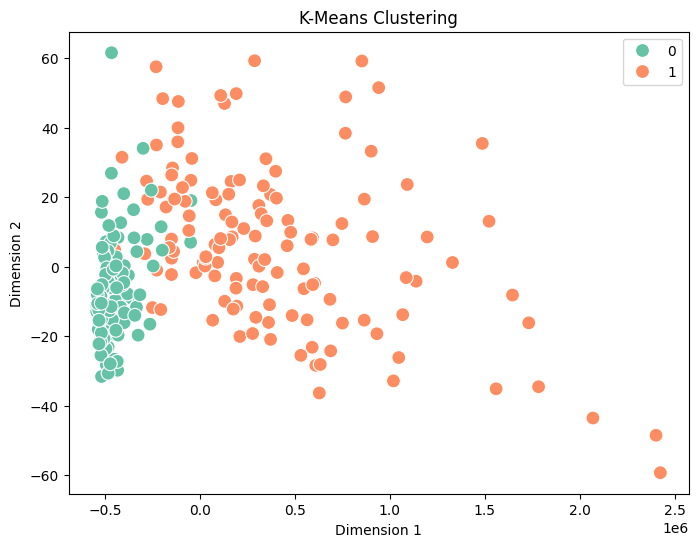

In [ ]:
#Plotting the clusers by color. Doing this with dimensions
plt.figure(figsize=(8, 6))
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X) #Reducing my data to two dimensions with the largest variance (most scattered points) for this graph using PCA, for the purpose of this chart.
sns.scatterplot(x=reduced_data[:, 0], y=reduced_data[:, 1], hue=clusters, palette='Set2', s=100)
plt.title('K-Means Clustering')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [ ]:
#Putting a column based off KMeans labels back into our original dataframe.
df_movies['Success or Not'] = labels
df_movies.head()

,Title,Year,Rated,Released Month,Runtime (Minutes),Genre,Director,Writer,Starring Actor,Country,IMDb Votes,IMDb Rating,Metascore,BoxOffice,Success or Not
0,The Shawshank Redemption,1994,R,Oct,142,Drama,Frank Darabont,Stephen King,Tim Robbins,United States,2970162,9.3,82,28767189.0,1
1,The Godfather,1972,R,Mar,175,Crime,Francis Ford Coppola,Mario Puzo,Marlon Brando,United States,2068172,9.2,100,136381073.0,1
2,The Dark Knight,2008,PG-13,Jul,152,Action,Christopher Nolan,Jonathan Nolan,Christian Bale,United States,2947373,9.0,84,534987076.0,1
3,Inception,2010,PG-13,Jul,148,Action,Christopher Nolan,Christopher Nolan,Leonardo DiCaprio,United States,2615361,8.8,74,292587330.0,1
4,The Lord of the Rings: The Return of the King,2003,PG-13,Dec,201,Action,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,2032567,9.0,94,381878219.0,1


In [ ]:
#Applying a function to rename columns based on labels.
df_movies['Success or Not'] = np.where(df_movies['Success or Not'] == 1, 'Success', 'Not Success')

In [ ]:
df_movies.sample(10)

,Title,Year,Rated,Released Month,Runtime (Minutes),Genre,Director,Writer,Starring Actor,Country,IMDb Votes,IMDb Rating,Metascore,BoxOffice,Success or Not
68,Divergent,2014,PG-13,Mar,139,Action,Neil Burger,Evan Daugherty,Shailene Woodley,United States,498577,6.6,48,150947895.0,Not Success
240,The Croods: A New Age,2020,PG,Nov,95,Animation,Joel Crawford,Kevin Hageman,Nicolas Cage,United States,55491,6.9,56,58568815.0,Not Success
129,Requiem for a Dream,2000,NC-17,Dec,102,Drama,Darren Aronofsky,Hubert Selby Jr.,Ellen Burstyn,United States,917768,8.3,71,3635482.0,Success
86,It,2017,R,Sep,135,Horror,Andy Muschietti,Chase Palmer,Bill Skarsgård,United States,629675,7.3,69,328874981.0,Success
24,The Social Network,2010,PG-13,Oct,120,Biography,David Fincher,Aaron Sorkin,Jesse Eisenberg,United States,776569,7.8,95,96962694.0,Success
131,The Theory of Everything,2014,PG-13,Nov,123,Biography,James Marsh,Anthony McCarten,Eddie Redmayne,United Kingdom,489313,7.7,71,35893537.0,Success
39,Inside Out,2015,PG,Jun,95,Animation,Pete Docter,Pete Docter,Amy Poehler,United States,840314,8.1,94,356461711.0,Success
22,The Grand Budapest Hotel,2014,R,Mar,99,Adventure,Wes Anderson,Stefan Zweig,Ralph Fiennes,United States,907125,8.1,88,59301324.0,Success
11,Spider-Man: No Way Home,2021,PG-13,Dec,148,Action,Jon Watts,Chris McKenna,Tom Holland,United States,917666,8.2,71,814866759.0,Success
33,A Beautiful Mind,2001,PG-13,Jan,135,Biography,Ron Howard,Akiva Goldsman,Russell Crowe,United States,1005100,8.2,72,170742341.0,Success


In [ ]:
#Intertia score is not as bad, it could be lower. This shows the clustered data is a little too close to the center, but it isn't too close.
KM.inertia_

452.07279897238595

In [ ]:
#Silhouette score is at .49. The data point is not too far off from the other data points, but not as close.
metrics.silhouette_score(scaled_df, clusters)

0.4759364513872507

In [ ]:
#Calinski Harabasz score is higher, which is good and indicates our model has well seperated clusters, closer to each other.
metrics.calinski_harabasz_score(scaled_df, clusters)

280.46452460066575

# **Step 4: Data Visualization and Analysis**

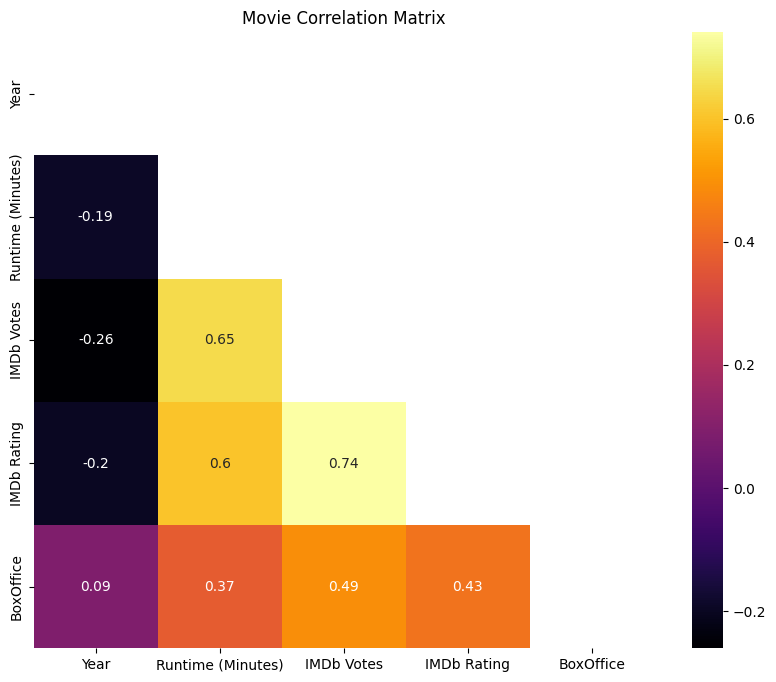

In [ ]:
#Correlation matrix on each variable
numeric_df = df_movies.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10,8))
correlation_matrix = numeric_df.corr(numeric_only=True).round(2)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='inferno')
plt.title('Movie Correlation Matrix')
plt.show()

This analysis highlights key correlations between movie data, including a strong positive correlation (0.74) between IMDb votes and ratings. This suggests that movies with more votes tend to have higher ratings, driven by greater audience engagement. Movie marketing teams should focus on promoting films widely to capture attention and drive success.

Another finding is the weak correlation (0.06) between IMDb ratings and box office revenue. While higher ratings can lead to greater earnings, the relationship is not strong. Some movies with low ratings may still generate high revenue, often due to viral marketing or being "so bad that it's funny."  Thus, movie producers should not rely solely on IMDb ratings for predicting financial success and should prioritize strategies that attract large audiences.

<ipython-input-41-76d11713d31e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_success.index, y=genre_success.values, palette="inferno")


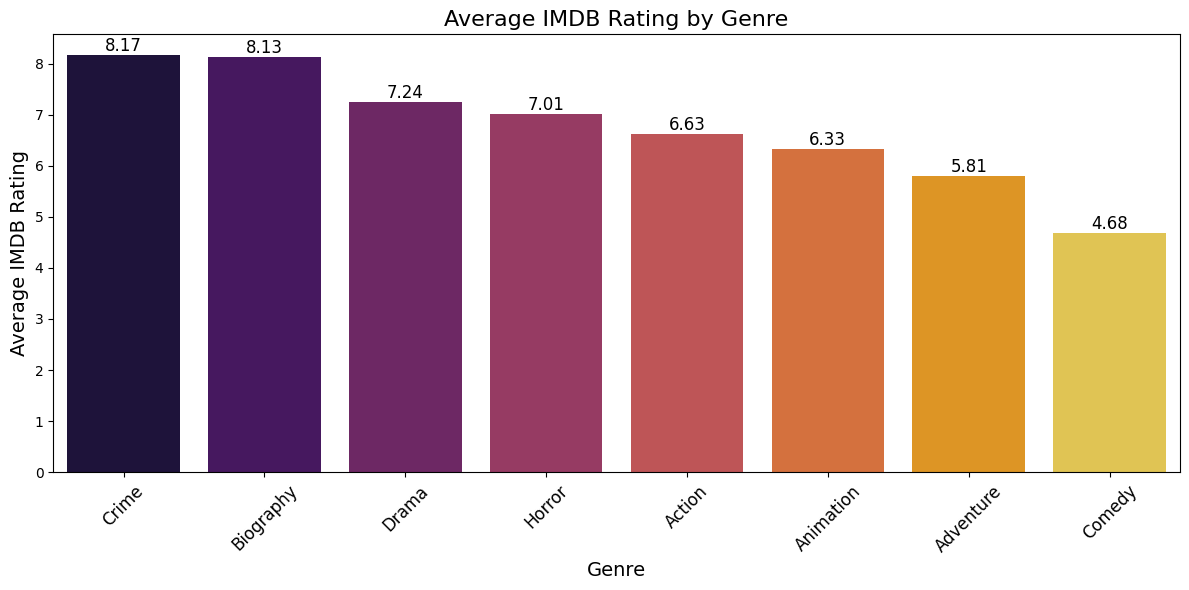

In [ ]:
#Group the data by genre and find the mean of the IMDb Rating
genre_success = df_movies.groupby('Genre')['IMDb Rating'].mean().sort_values(ascending=False)

    # Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_success.index, y=genre_success.values, palette="inferno")
plt.title("Average IMDB Rating by Genre", fontsize=16)
plt.xlabel("Genre", fontsize=14)
plt.ylabel("Average IMDB Rating", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()

for i, v in enumerate(genre_success.values):
        plt.text(i, v, f"{v:.2f}", ha='center', va='bottom', fontsize=12)

plt.show()

This analysis reveals that crime movies tend to perform exceptionally well on IMDb, with an average rating of 8.17. Biographies also achieve high ratings, closely following crime movies with an average of 8.13. These insights suggest that movie studios should consider producing more crime and biography films to capitalize on their strong audience approval and potential for higher ratings.

In contrast, comedies do not fare as well on IMDb, with an average rating of just 4.68. This indicates that audiences may be more critical of comedy films, or their humor doesn't resonate to a broad audience. To address this, studios could focus on creating high-quality comedies with more universally appealing humor to boost their ratings, or create comedy movies for a sector of demographics such as Gen Z or Millenials and market it to only that sector through channels that target those audiences (do an analysis of what channels trend among each demographic, for example, Meta trends with Gen Z), this way we are able to achieve higher ratings.

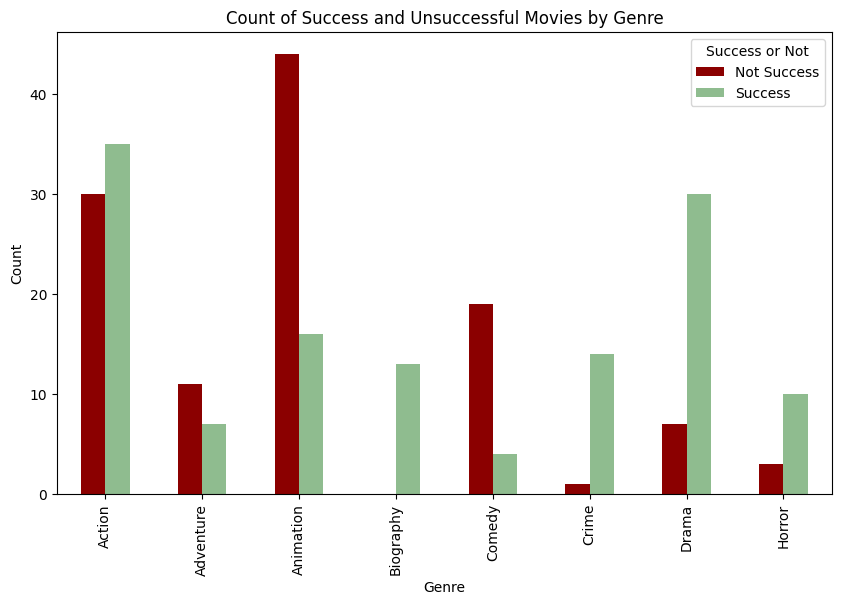

In [ ]:
#Plotting count of success and unsuccessful movies in each genre.
genrecount = df_movies.groupby(['Genre', 'Success or Not']).size().unstack()
genrecount.plot(kind='bar', stacked=False, figsize=(10, 6), color=['darkred', 'darkseagreen'])
plt.title('Count of Success and Unsuccessful Movies by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.legend(title='Success or Not')
plt.show()

This analysis reveals the genres that tend to be successful versus unsuccessful based on the KMeans model and the created categories. According to the visualization, action movies and dramas are among the most successful genres, while animation films exhibit the highest proportion of unsuccessful movies in our sample. Based on these findings, filmmakers may want to shift their focus toward creating biographies, as they are one of the genres with the highest average ratings, as shown in the previous visualization. Additionally, filmmakers should consider shifting their focus away from the animation genre, given that it has some of the lowest ratings and the highest number of unsuccessful films.

Further analysis suggests that the KMeans clustering was significantly influenced by the ratings when determining movie success. Higher-rated genres, such as action and drama, are associated with a greater number of successful films, while genres with lower ratings, like animation, show a higher proportion of unsuccessful films. This indicates that ratings play a critical role in defining a movie’s success within the KMeans model, and filmmakers could prioritize improving film quality and ratings to increase the likelihood of success. By understanding the relationship between genre and rating, filmmakers can make more informed decisions about the types of movies to produce, improving their chances of success of future films.

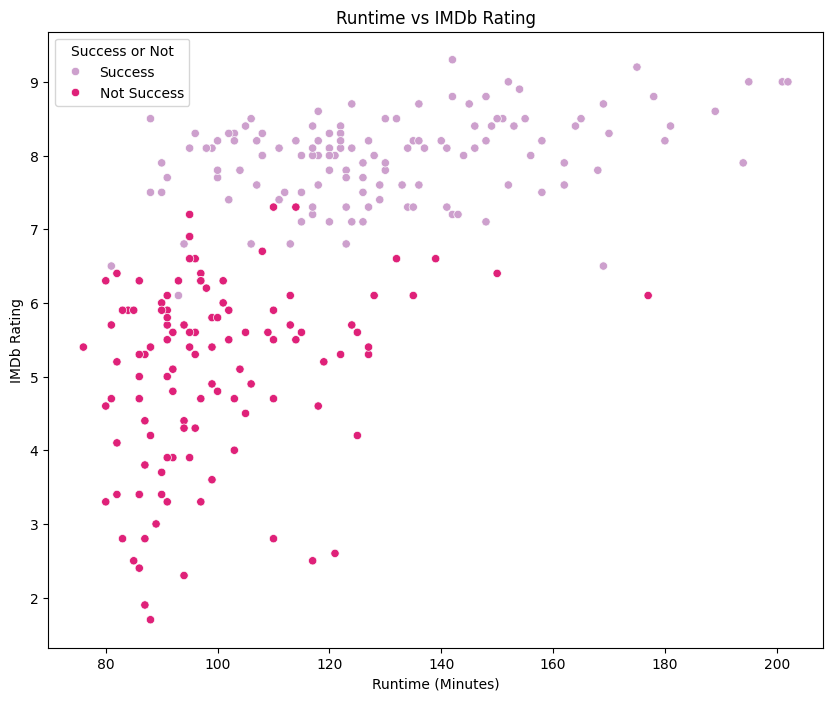

In [ ]:
#An interesting correlation found was between runtime and IMDb rating, the higher the runtime, the higher the rating.
#We will visualize this in a scatter plot.

plt.figure(figsize=(10,8))
sns.scatterplot(data=df_movies, x='Runtime (Minutes)', y='IMDb Rating', hue='Success or Not', palette='PuRd')
plt.title('Runtime vs IMDb Rating')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('IMDb Rating')
plt.show()

An interesting correlation that was observed in the analysis is that movies with longer runtimes tend to have a higher chance of success. This finding suggests that, in general, films with extended durations may be perceived as more developed, potentially offering more in-depth storytelling or higher production value. These longer films might attract a larger audience, as viewers often associate length with greater quality. However, it's important to balance length with engaging content, as overstretched plots could risk losing audience interest and lower ratings. Additionally, new audience members may be turned away from watching a movie due to its length, so its important to keep runtime in mind and ensure a good balance.

# **Model Evaluation**

This project analyzes movie data by applying machine learning techniques to predict box office performance and group movies based on their success. The dataset, consisting of 244 movie records from the OMDb API, includes features like genre, runtime, ratings, and box office numbers. The linear regression model achieved an RMSE of 73.89%, indicating that while predictions could be improved, the model provides a decent starting point. For clustering, the KMeans algorithm resulted in a Silhouette Score of 0.49, showing average cohesion within clusters, and a Calinski-Harabasz score of 280.47, suggesting well-separated groups. To improve accuracy, further refinement in feature selection, exploring different algorithms, and tuning hyperparameters are recommended. Overall, the project offers a strong foundation for further optimization and provides valuable insights into the factors driving movie success.